In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.linalg import expm
from scipy.integrate import quad

## Diskretisierung eines LTI-Systems

Gegeben ist das kontinuierliche, lineare, zeitinvariante System:

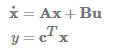

mit:

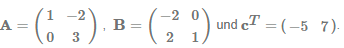

Wir wollen dieses System nun auf zwei verschiedene Weisen mit der Abtastzeit $T_a = 1$ diskretisieren.

Das heißt, wir suchen ein System der Form

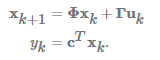

In [5]:
A = np.array([[1, -2],
              [0, 3]])
B = np.array([[-2, 0],
              [2, 1]])
C = np.array([[-5, 7]])
T_a = 1

### Frage A

Benutzen Sie das explizite Euler-Verfahren (welches auch für nichtlineare Systeme geeignet ist) aus Abschnitt 6.2.1 des Skriptums, um den Zustand $x_k$ vorwärts zu rechnen. Geben Sie die mit dieser Methode erhaltenen Matrizen $\Phi$ und $\Gamma$ an:

In [7]:
Phi = np.eye(2) + T_a * A
Gamma = T_a * B
print(f"die Dynamikmatrix: \n{Phi}")
print(f"\nder Eingangsvektor: \n{Gamma}")

die Dynamikmatrix: 
[[ 2. -2.]
 [ 0.  4.]]

der Eingangsvektor: 
[[-2  0]
 [ 2  1]]


### Frabe B

b) Verwenden Sie nun die im Skriptum in Abschnitt 6.2.2 vorgestellte exakte Löung zur Diskretisierung von LTI-Systemen (unter Annahme eines Halteglieds nullter Ordnung). Geben Sie Ihre neuen Resultate für $\Phi$ und $\Gamma$ an:

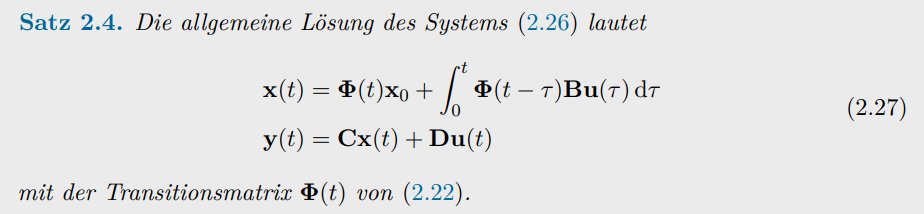

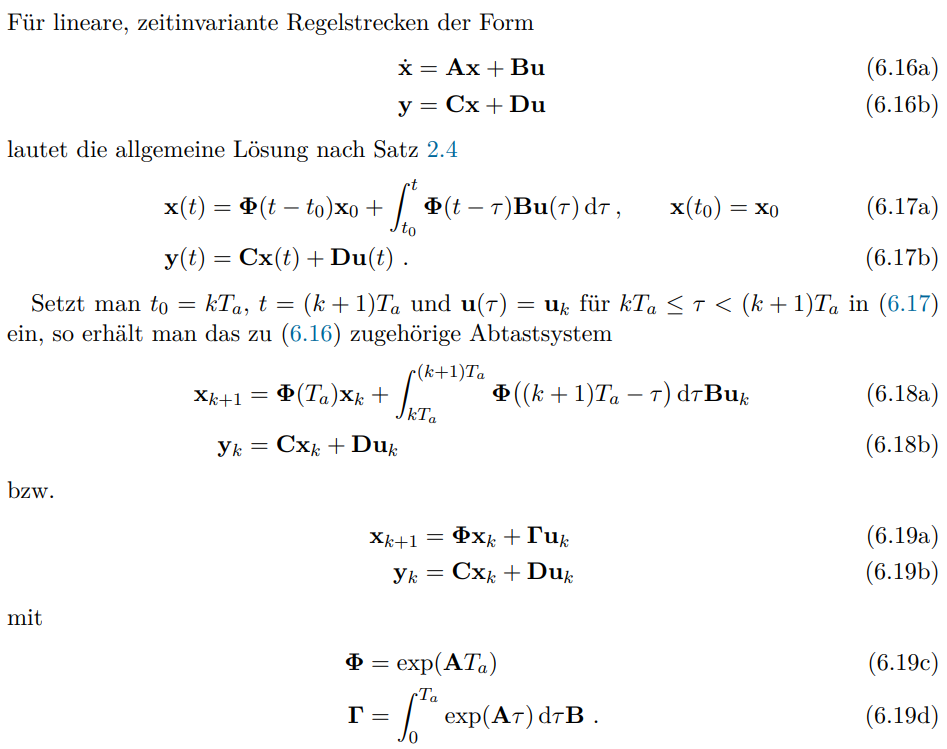

In [10]:
Phi_t_built_in = expm(A * T_a)
print(f"Built in expm function: \n{Phi_t_built_in}")

def taylor_exp_m(A, t):
    E = np.eye(A.shape[0])
    return E + A*t + A*A*(t**2)/2

Built in expm function: 
[[  2.71828183 -17.36725509]
 [  0.          20.08553692]]


In [11]:
Phi_t = taylor_exp_m(A, T_a)
print(Phi_t)

[[2.5 0. ]
 [0.  8.5]]


In [12]:
# Using built in function
Phi = Phi_t_built_in
print(Phi)

[[  2.71828183 -17.36725509]
 [  0.          20.08553692]]


In [19]:
def eingangsvektor(A, B, T_a):
    tau = sp.symbols('tau', real=True)
    Phi = sp.Matrix([[sp.exp(tau), sp.exp(tau)-sp.exp(3*tau)],[0, sp.exp(3*tau)]])
    integral_gamma = sp.Matrix(Phi.shape[0], Phi.shape[1], lambda i, j: sp.integrate(Phi[i, j], (tau,0,T_a)))
    B_sym = sp.Matrix(B) if not isinstance(B, sp.Matrix) else B
    Gamma = integral_gamma * B_sym
    return Phi, Gamma

In [21]:
eingangsvektor(A,B, T_a)

(Matrix([
 [exp(tau), -exp(3*tau) + exp(tau)],
 [       0,             exp(3*tau)]]),
 Matrix([
 [ 2/3 - 2*exp(3)/3, -exp(3)/3 - 2/3 + E],
 [-2/3 + 2*exp(3)/3,     -1/3 + exp(3)/3]]))

## Erreichbarer Unterraum und Zustandsregler

### Frage A
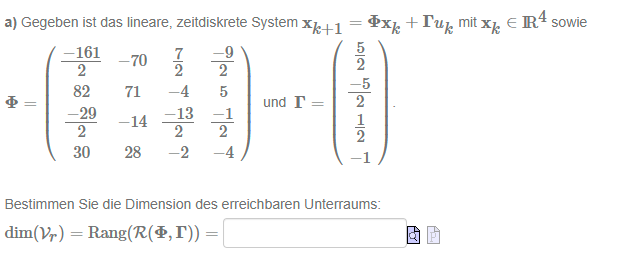

In [31]:
from numpy.linalg import matrix_rank

Phi = np.array([[-161/2, -70, 7/2, -9/2], [82, 71, -4, 5], [-29/2, -14, -13/2, -1/2], [30, 28, -2, -4]])
Gamma = np.array([[5/2],[-5/2],[1/2],[-1]])

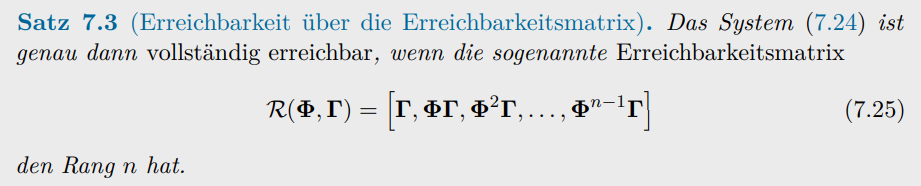

In [62]:
from numpy.linalg import matrix_power

R1 = Gamma.transpose()
R1 = R1.tolist()
R2 = np.matmul(Phi, Gamma).transpose().tolist()
R3 = np.matmul(matrix_power(Phi, 2), Gamma).transpose().tolist()
R4 = np.matmul(matrix_power(Phi, 3), Gamma).transpose().tolist()
R = np.array([R1[0], R2[0], R3[0], R4[0]]).transpose()
print(R)

[[ 2.500e+00 -2.000e+01  1.250e+02 -7.550e+02]
 [-2.500e+00  2.050e+01 -1.285e+02  7.765e+02]
 [ 5.000e-01 -4.000e+00  2.500e+01 -1.510e+02]
 [-1.000e+00  8.000e+00 -5.000e+01  3.020e+02]]


In [64]:
print(matrix_rank(R))

2


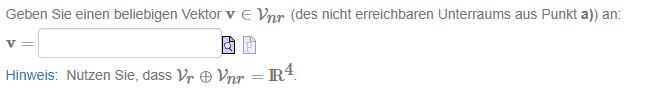

Matlab Code
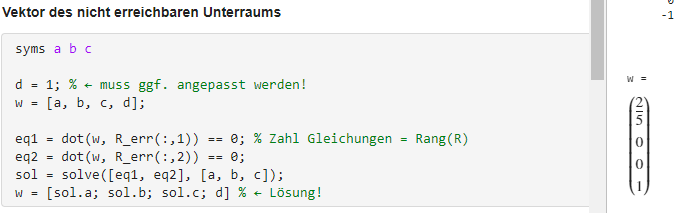

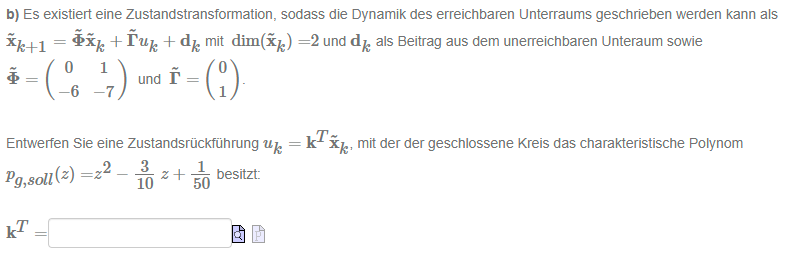